In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
X = np.load("C:/Users/ADMIN/Desktop/WhiteHat_Jr/General/Data/Alphabet-Recognition-Image-1.npz")['arr_0']
y = pd.read_csv("C:/Users/ADMIN/Desktop/WhiteHat_Jr/General/Data/Alphabet-Recognition-1.csv")['labels']

print(y)
print("------------------------------------------")
print(X)

0        F
1        Z
2        U
3        Q
4        S
        ..
14295    Y
14296    U
14297    N
14298    V
14299    T
Name: labels, Length: 14300, dtype: object
------------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
nclasses = len(classes)

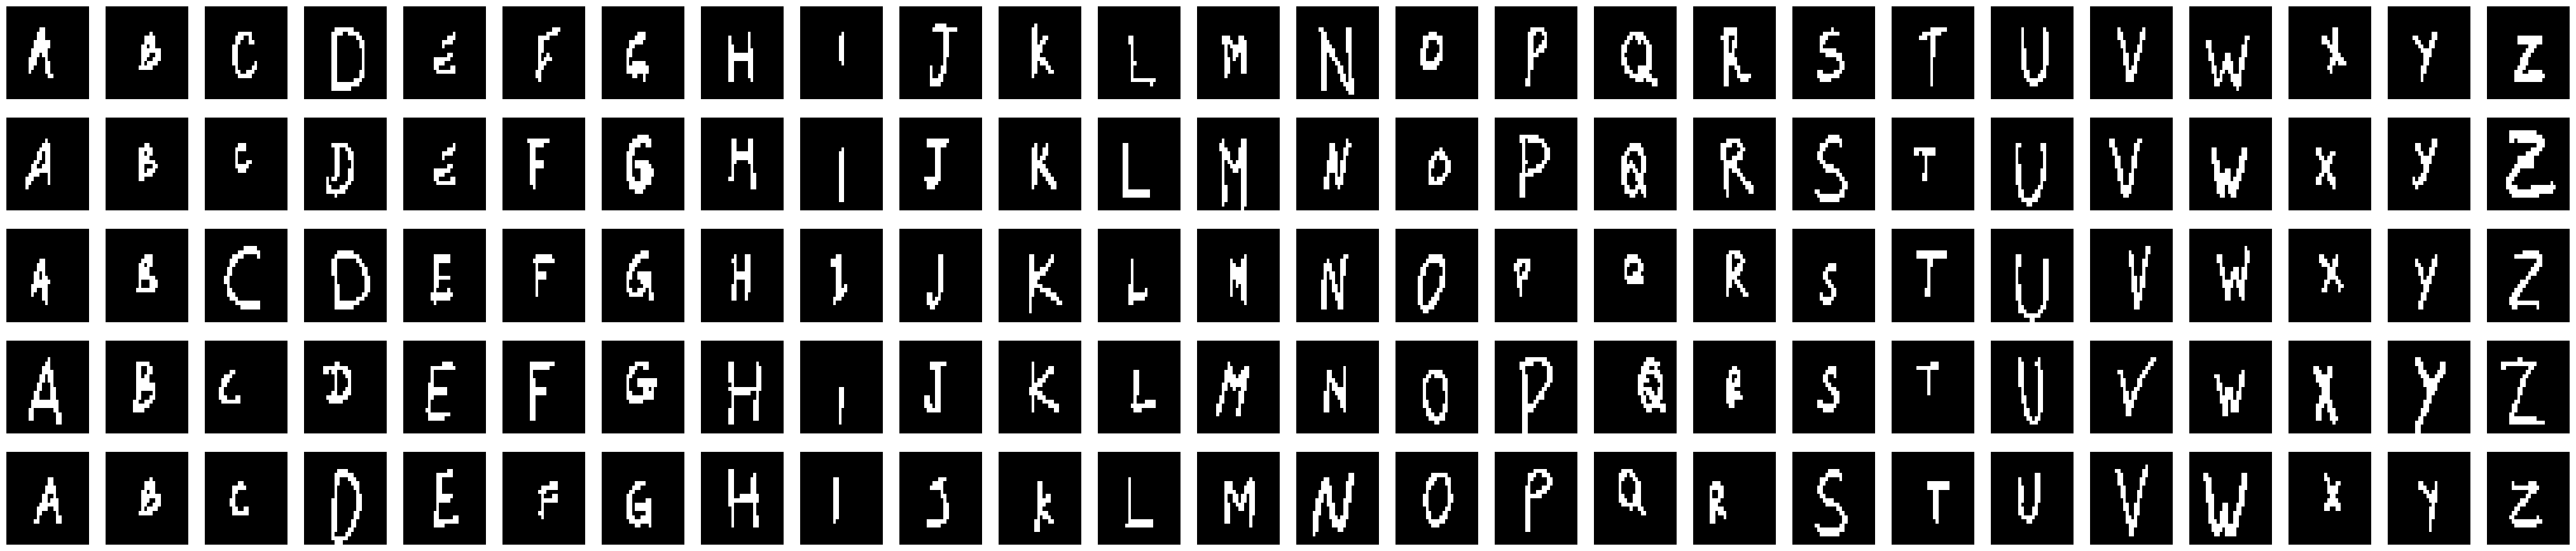

In [10]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx],(22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

#idxs = np.flatnonzero(y == '0')
#print(np.array(X.loc[idxs[0]]))


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=0.25)

#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


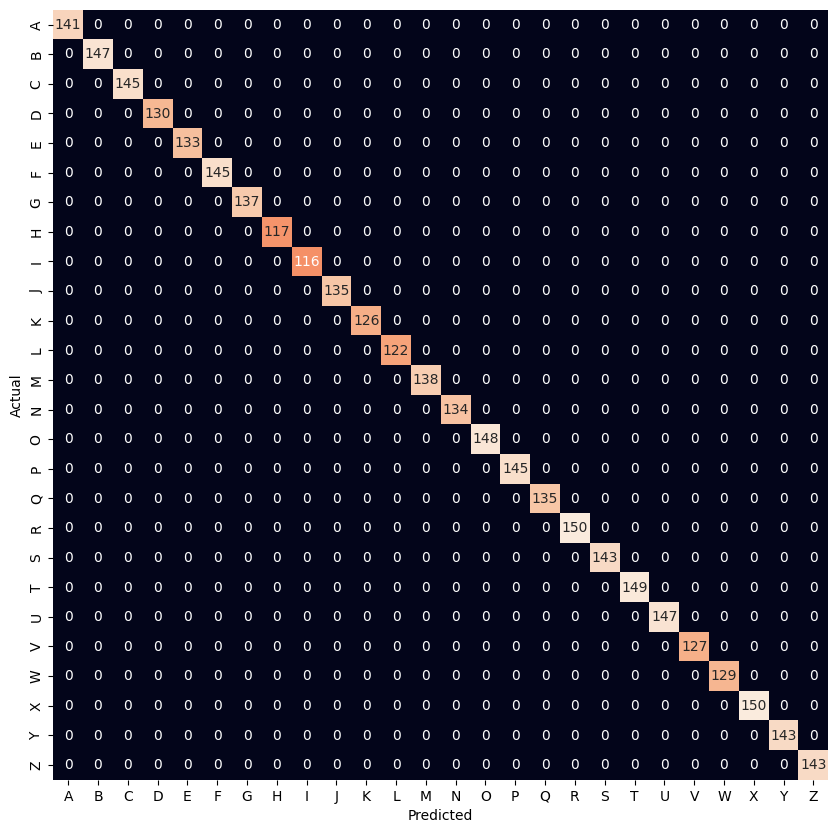

In [19]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)
#print(cm)